## Bar Graph
This Graph uses the bar_assignment.csv in the csv_files folder.

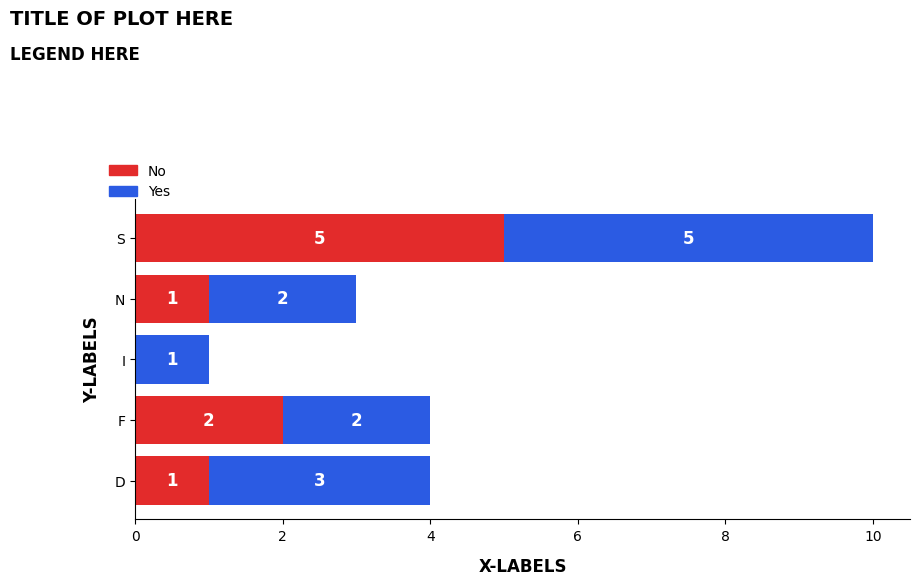

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv("csv_files/bar_assignment.csv")

# Ensure columns are correctly formatted
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Create a cross-tabulation
data = pd.crosstab(df['LABEL'], df['COUNT'])
data = data.sort_index()

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Define colors
colors = {"No": "#E32B2B", "Yes": "#2B5BE3"}

# Plot bars
bars_no = ax.barh(data.index, data['No'], color=colors["No"], label="No")
bars_yes = ax.barh(data.index, data['Yes'], left=data['No'], color=colors["Yes"], label="Yes")

# Add labels inside the bars
for bar, value in zip(bars_no, data['No']):
    if value > 0:
        ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2, str(value), 
                va='center', ha='center', color='white', fontweight='bold', fontsize=12)

for bar, value, left in zip(bars_yes, data['Yes'], data['No']):
    if value > 0:
        ax.text(left + value / 2, bar.get_y() + bar.get_height()/2, str(value), 
                va='center', ha='center', color='white', fontweight='bold', fontsize=12)

# Style the title and legend placement
plt.figtext(0, 1.1, "TITLE OF PLOT HERE", fontsize=14, fontweight='bold', ha='left')
plt.figtext(0, 1.03, "LEGEND HERE", fontsize=12, fontweight='bold', ha='left')

# Custom legend using patches
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=colors['No'], label='No'),
                  plt.Rectangle((0, 0), 1, 1, color=colors['Yes'], label='Yes')]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(-0.05, 1.15), frameon=False)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels
ax.set_xlabel("X-LABELS", fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel("Y-LABELS", fontsize=12, fontweight='bold', labelpad=10)

# Adjust layout so title & legend are above the plot
plt.subplots_adjust(top=0.75)

# Show plot
plt.show()
